In [1]:
import os
import pandas as pd
import mysql.connector as mysql

connection = mysql.connect(
    host= 'localhost',
    passwd= '',
    user= 'root',
    port= '3306',
    database= 'cyber_attacks'
)

In [2]:
dbFrame = pd.read_sql_query("SELECT * FROM attack_data_tbl", con= connection)
dbFrame.drop(['id'], axis= 1).head()

/var/folders/r4/xgwc_q155gg559hp47mlyhhc0000gn/T/ipykernel_73301/3774062326.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dbFrame = pd.read_sql_query("SELECT * FROM attack_data_tbl", con= connection)


,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
df = dbFrame.drop(['id'], axis= 1)
df.head()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [4]:
df.describe()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWindow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


array([[<AxesSubplot: title={'center': 'SFH'}>,
        <AxesSubplot: title={'center': 'popUpWindow'}>,
        <AxesSubplot: title={'center': 'SSLfinal_State'}>],
       [<AxesSubplot: title={'center': 'Request_URL'}>,
        <AxesSubplot: title={'center': 'URL_of_Anchor'}>,
        <AxesSubplot: title={'center': 'web_traffic'}>],
       [<AxesSubplot: title={'center': 'URL_Length'}>,
        <AxesSubplot: title={'center': 'age_of_domain'}>,
        <AxesSubplot: title={'center': 'having_IP_Address'}>],
       [<AxesSubplot: title={'center': 'Result'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

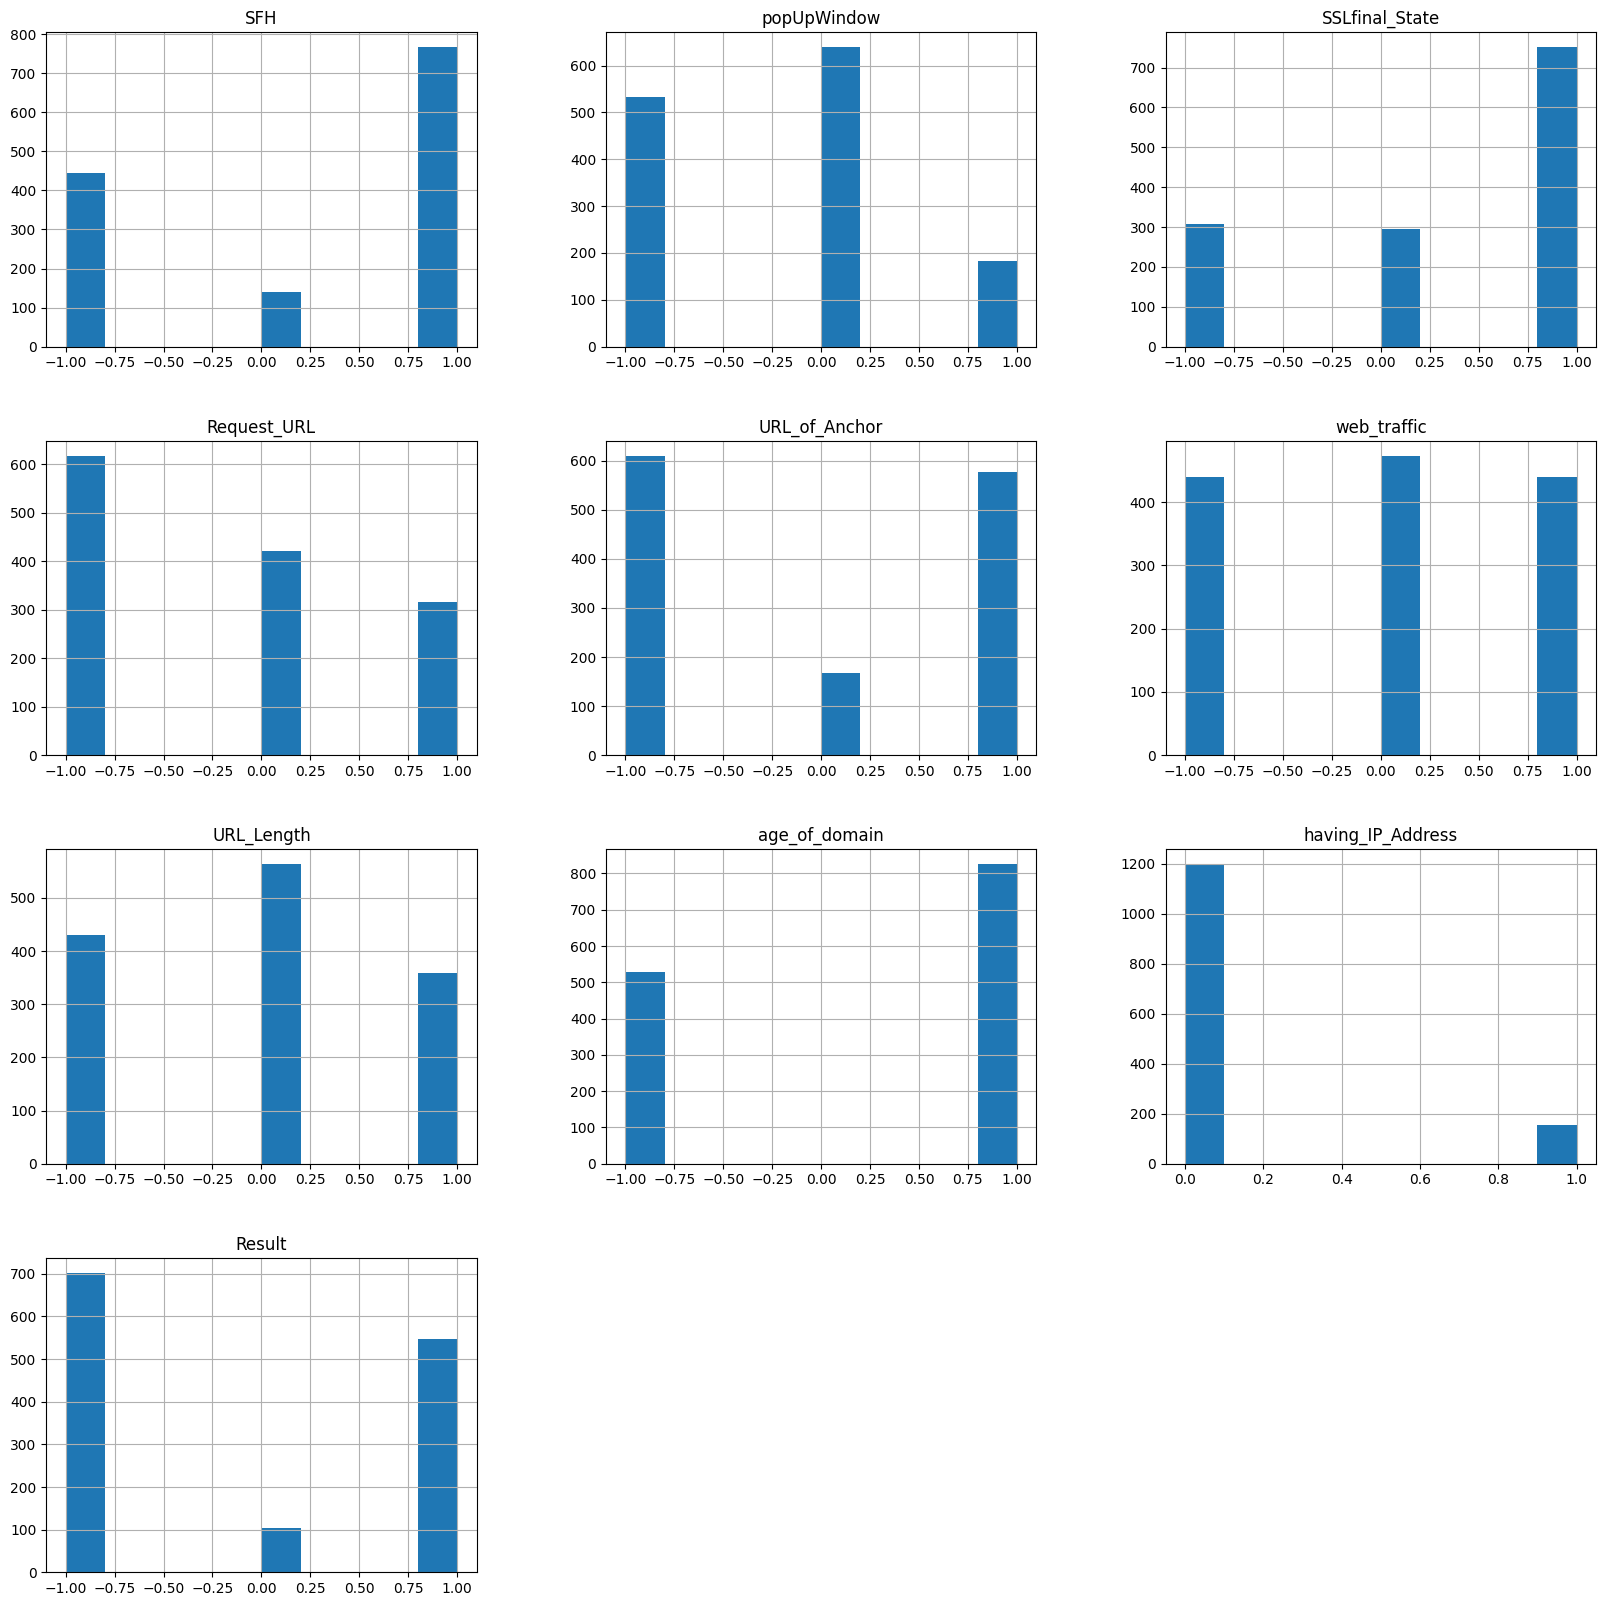

In [6]:
df.hist(figsize=(20, 20))

## Creating SVM Model

#### Importing Model

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

#### create Train and Test set

In [8]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

#### Remove Result from training data

In [9]:
trainX = train.drop(['Result'], axis=1)
trainX.head()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
966,-1,-1,-1,-1,1,1,-1,-1,0
932,1,0,1,1,1,1,0,1,0
109,-1,-1,0,-1,-1,0,1,-1,1
714,0,0,1,0,1,-1,0,1,1
1200,-1,0,1,-1,-1,0,-1,-1,0


In [10]:
trainY = train.Result
trainY.head()

966     1
932    -1
109     1
714     1
1200    1
Name: Result, dtype: int64

In [11]:
testX = test.drop(['Result'], axis=1)
testX.head()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
49,1,1,-1,-1,1,-1,1,1,0
638,-1,-1,0,-1,-1,1,-1,-1,0
1033,1,0,1,-1,1,-1,0,1,0
746,1,0,1,1,1,-1,0,1,0
918,-1,-1,1,-1,-1,0,0,1,0


In [12]:
testY = test.Result
testY.head()

49      0
638     1
1033   -1
746    -1
918     1
Name: Result, dtype: int64

In [13]:
svmRBF = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo').fit(trainX, trainY)
rbfPrediction = svmRBF.predict(testX)
svmRBF.score(testX, testY)

0.8265682656826568

In [14]:
svmPoly = svm.SVC(kernel='poly', C=1, decision_function_shape='ovo').fit(trainX, trainY)
rbfPoly = svmPoly.predict(testX)
svmPoly.score(testX, testY)

0.8450184501845018

Text(0.5, 1.0, 'Radial Basis Function predicted in Red, actual value in blue')

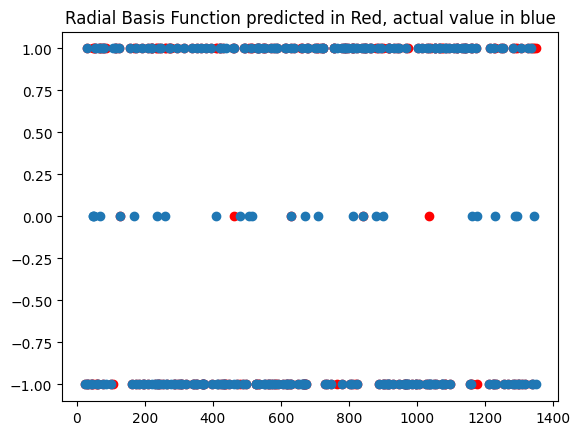

In [15]:
import matplotlib.pyplot as plt
plt.scatter(testX.index.values, rbfPrediction, color='red')
plt.scatter(testX.index.values, testY)
plt.title('Radial Basis Function predicted in Red, actual value in blue')

Text(0.5, 1.0, 'Polynomial Function predicted in Red, actual value in blue')

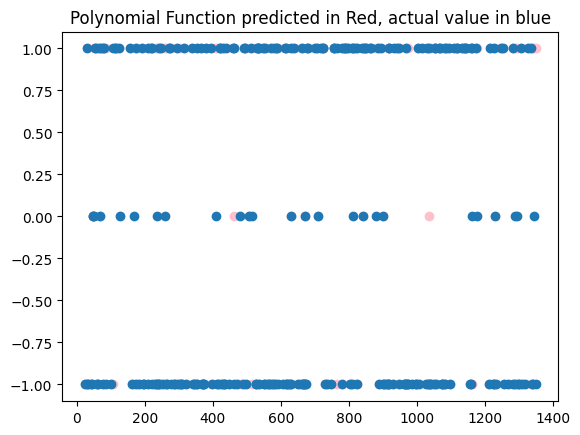

In [16]:
import matplotlib.pyplot as plt
plt.scatter(testX.index.values, rbfPoly, color='pink')
plt.scatter(testX.index.values, testY)
plt.title('Polynomial Function predicted in Red, actual value in blue')

In [17]:
sfh = int(input("sfh"))
popUPWindow = int(input("popUPWindow"))
SSL_final_state = int(input("SSL_final_state"))
Request_url = int(input("Request_url"))
url_of_anchor = int(input("url_of_anchor"))
web_traffic = int(input("web_traffic"))
url_length = int(input("url_length"))
age_of_domain = int(input("age_of_domain"))
having_ip = int(input("having_ip"))

sfh1
popUPWindow1
SSL_final_state1
Request_url1
url_of_anchor1
web_traffic1
url_length1
age_of_domain1
having_ip1


In [18]:
result = svmPoly.predict([[sfh, popUPWindow, SSL_final_state, Request_url, url_of_anchor, web_traffic, url_length, age_of_domain, having_ip]])
print(result[0])

-1


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [19]:
#import pickle

#pickle.dump(svmPoly, open('cyber_model.pkl', 'wb'))

In [27]:
from statsmodels.api import OLS
OLS(trainY,trainX).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Result   R-squared (uncentered):                   0.637
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              208.9
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                   8.47e-229
Time:                        18:50:37   Log-Likelihood:                         -947.12
No. Observations:                1082   AIC:                                      1912.
Df Residuals:                    1073   BIC:                                      1957.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
SFH                  -0.4733      0.022    -21.057      0.000      -0.517      -0.429
popUpWindow          -0.3493      0.026    -13.495      0.000      -0.400      -0.299
SSLfinal_State       -0.2956      0.023    -12.719      0.000      -0.341      -0.250
Request_URL          -0.1126      0.023     -4.872      0.000      -0.158      -0.067
URL_of_Anchor        -0.0476      0.021     -2.261      0.024      -0.089      -0.006
web_traffic           0.0260      0.030      0.866      0.387      -0.033       0.085
URL_Length           -0.0372      0.024     -1.558      0.119      -0.084       0.010
age_of_domain        -0.0665      0.025     -2.704      0.007      -0.115      -0.018
having_IP_Address     0.0770      0.055      1.408      0.159      -0.030       0.184
==============================================================================
Omnibus:                       10.306   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               14.997
Skew:                           0.042   Prob(JB):                     0.000554
Kurtosis:                       3.570   Cond. No.                         4.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""